# ARIMA Model

### What is an ARIMA model?

**AR:** Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

**I:** Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA:** Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


##### The parameters of the ARIMA model are defined as follows:

**p:** The number of lag observations included in the model, also called the lag order.

**d:** The number of times that the raw observations are differenced, also called the degree of differencing.

**q:** The size of the moving average window, also called the order of moving average.

### Import Packages

In [1]:
import os
import pandas as pd
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima

#from pmdarima.arima import auto_arima
import time

### Get Data

In [2]:
data_dir = "/gpfs/gpfs0/project/SDS/instructional/ds5110_sp23_finalproject/"

In [7]:
agg_data_daily = pd.read_csv(data_dir + "aggregate_data_daily.csv")

agg_data_daily = agg_data_daily.set_index("date")
agg_data_daily.index = pd.DatetimeIndex(agg_data_daily.index)

In [8]:
print(len(agg_data_daily))
agg_data_daily.head()

1769


,close,high,low,open,volume,sma5,sma10,sma15,sma20,ema5,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,131288.958237,131349.417179,131229.601955,131286.480705,913732.743590,131284.209006,131278.897301,131274.004613,131269.574686,131284.381505,...,4185.103972,4349.078852,4347.786014,4243.926555,-4569.996794,123.060885,123.854199,131289.325791,1856.672161,29.413975
2015-02-03,131832.877280,131918.827600,131747.429387,131837.580720,936348.072000,131841.322645,131851.470080,131861.067426,131870.462753,131841.190402,...,4201.208571,4267.691967,4266.097873,4349.520327,-4624.607800,175.531286,177.491147,131833.044756,1850.806014,32.266154
2015-02-04,129468.922827,129537.612613,129402.188933,129471.623013,887441.512000,129480.442459,129493.245917,129505.959004,129518.131477,129480.170210,...,4282.346297,4365.674560,4366.273596,4309.880640,-4478.144418,143.180905,143.231867,129469.574791,1810.422482,32.472286
2015-02-05,129249.723173,129317.821493,129181.671733,129248.157733,853214.317333,129247.353024,129246.376232,129246.078405,129246.293272,129247.729483,...,4360.040253,4370.202737,4371.174798,4390.548113,-4422.675177,142.086475,142.190373,129249.738800,1866.926771,34.137286
2015-02-06,127985.717387,128065.870400,127915.340693,127994.159200,813405.013333,127991.635936,127998.763027,128006.067154,128013.714268,127991.612995,...,4281.577005,4405.903914,4408.064297,4285.640985,-4514.621708,158.384781,157.028987,127988.976160,1823.159505,31.149459


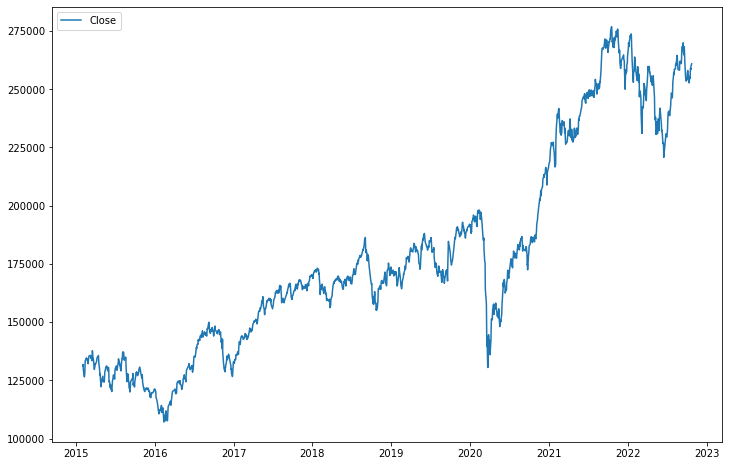

In [9]:
plt.figure(figsize=(12,8))
plt.plot(agg_data_daily.index, agg_data_daily.close, label="Close")
plt.legend(loc="upper left")
plt.show()

In [34]:
train_daily = agg_data_daily[:1500]
test_daily = agg_data_daily[1500:]
train_daily.index = pd.DatetimeIndex(train_daily.index)#.to_period('D')
test_daily.index = pd.DatetimeIndex(test_daily.index)#.to_period('D')

## ARIMA 

In [8]:
# modelauto = auto_arima(train.close, trace=True, suppress_warnings=True)
# print(modelauto.summary())

/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


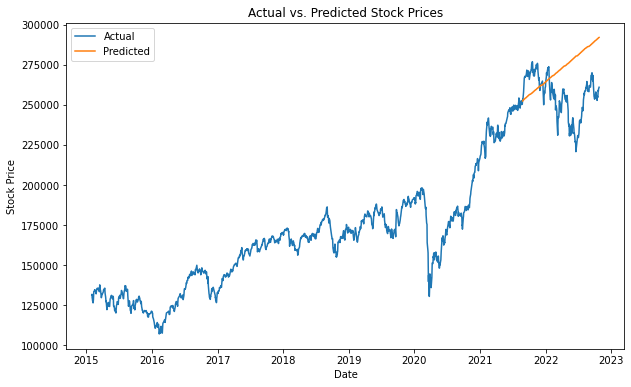

In [35]:
model = ARIMA(train_daily.close, order=(3,2,12)) #order=(3,2,12)
model = model.fit()

pred = model.predict(start=1500, end = 1768, typ='levels')

# Visualize predictions and actual stock prices
plt.figure(figsize=(10,6))
plt.plot(agg_data_daily.close, label='Actual')
plt.plot(test_daily.index, pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

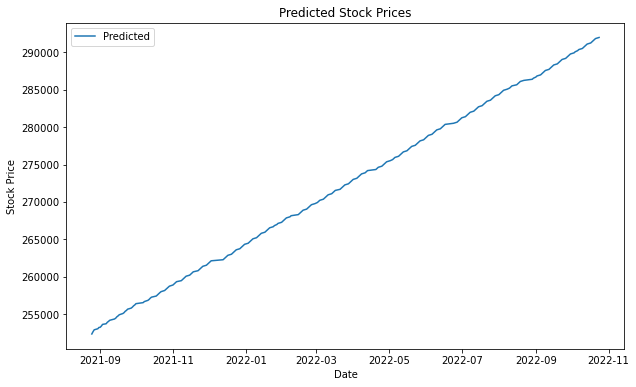

In [36]:
plt.figure(figsize=(10,6))
plt.plot(test_daily.index, pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices')
plt.legend()
plt.show()

In [17]:
history = train_monthly.close[75:]
predictions = list()

# walk-forward validation
for t in range(len(test_monthly)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = train.close[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test.close, predictions)
print('Test MSE: %.3f' % mse)

/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/base/model.py:531: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
/home/ak7ra/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IndexError: index 0 is out of bounds for axis 0 with size 0